In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#mnist dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train[0].shape

(28, 28)

In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

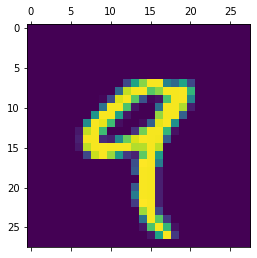

In [5]:
#visualisation of handwritten no at position 4
plt.matshow(X_train[4])

In [6]:
y_train[4]

9

In [7]:
#scaling the data inorder to get good accuracy
X_train = X_train/255
X_test = X_test/255

In [8]:
#flattening or converting image grid from 2d to 1d
X_train.shape

(60000, 28, 28)

In [9]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_train.reshape(len(X_train),28*28)
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
X_test_flatten.shape

(60000, 784)

In [11]:
X_train_flatten.shape

(60000, 784)

In [11]:
#creating neural network
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4687 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3035 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2836 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2734 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2671 - accuracy: 0.9253


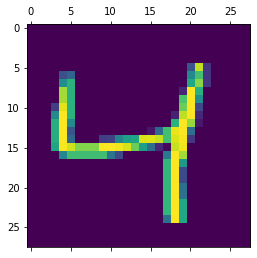

In [12]:
#checking the handwritten digit
plt.matshow(X_train[2])

In [13]:
y_predict = model.predict(X_test_flatten)
y_predict[2]

array([1.1246800e-03, 1.3116002e-04, 2.1808329e-01, 6.1314690e-01,
       8.9775866e-01, 7.3555112e-04, 2.4577677e-03, 1.8131357e-01,
       1.3697982e-02, 7.8180045e-02], dtype=float32)

In [14]:
#from above array with maximum score is the predicted number
np.argmax(y_predict[2])

4

In [15]:
model.predict(X_test_flatten)

array([[5.02022505e-02, 9.12903051e-05, 7.05271065e-02, ...,
        6.90551102e-02, 3.55958641e-02, 2.51752436e-02],
       [9.99932885e-01, 7.13508896e-08, 5.15830517e-02, ...,
        1.67700648e-03, 5.86496592e-02, 3.18698287e-02],
       [1.12468004e-03, 1.31160021e-04, 2.18083292e-01, ...,
        1.81313574e-01, 1.36979818e-02, 7.81800449e-02],
       ...,
       [1.89999044e-02, 3.78733873e-03, 3.88115644e-04, ...,
        1.38697028e-03, 7.33879089e-01, 3.74431014e-02],
       [1.08458996e-01, 1.25898760e-05, 3.79834175e-02, ...,
        1.10885501e-03, 1.49032474e-03, 2.71761417e-03],
       [4.46716875e-01, 1.25817387e-05, 2.24074125e-02, ...,
        4.02358174e-03, 8.79365683e-01, 2.65037149e-01]], dtype=float32)

# convolutional neural network

In [36]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [37]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1431 - accuracy: 0.9568
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0469 - accuracy: 0.9854
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0321 - accuracy: 0.9898
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0237 - accuracy: 0.9926
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0187 - accuracy: 0.9941


In [34]:

y_train[:5]


array([5, 0, 4, 1, 9], dtype=uint8)